In [5]:
import keras

In [6]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

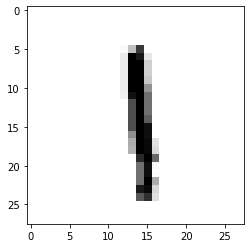

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)

In [4]:
print(y_train[8])

1


In [7]:
print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

3
(60000, 28, 28)
uint8


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
x_train /= 255
x_test /= 255

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [11]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
from keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [15]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Redes neuronales densas:

In [16]:
from keras.models import Sequential
model = Sequential()

In [17]:
from keras.layers.core import Dense, Activation
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

In [24]:
model.fit(x_train, y_train, batch_size=100, epochs=8)

Epoch 1/8
600/600 [==============================] - 1s 2ms/step - loss: 1.2053 - accuracy: 0.7713
Epoch 2/8
600/600 [==============================] - 1s 2ms/step - loss: 1.0880 - accuracy: 0.7912
Epoch 3/8
600/600 [==============================] - 1s 2ms/step - loss: 0.9930 - accuracy: 0.8049
Epoch 4/8
600/600 [==============================] - 1s 2ms/step - loss: 0.9160 - accuracy: 0.8148
Epoch 5/8
600/600 [==============================] - 1s 2ms/step - loss: 0.8530 - accuracy: 0.8231
Epoch 6/8
600/600 [==============================] - 1s 2ms/step - loss: 0.8009 - accuracy: 0.8293
Epoch 7/8
600/600 [==============================] - 1s 2ms/step - loss: 0.7572 - accuracy: 0.8359
Epoch 8/8
600/600 [==============================] - 1s 2ms/step - loss: 0.7200 - accuracy: 0.8404


In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.8456


In [26]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8456000089645386


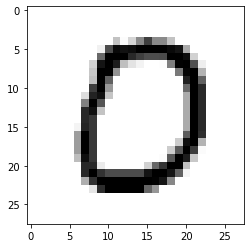

In [33]:
prueba = x_test.reshape(10000, 28, 28)
plt.imshow(prueba[10], cmap=plt.cm.binary)

In [30]:
predictions = model.predict(x_test)

In [34]:
import numpy as np
np.argmax(predictions[10])

0

In [36]:
print(predictions[10])
print(np.sum(predictions[10]))

[0.84067816 0.00140698 0.01044438 0.03274305 0.00567163 0.07859433
 0.00921844 0.00235149 0.01777921 0.0011123 ]
1.0


### Redes neuronales convolucionales:

In [37]:
from keras import layers, models

In [38]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
model_2.add(layers.MaxPooling2D((2,2)))

In [39]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.add(layers.Dense(10, activation='softmax'))

In [37]:
#Codificando redes neuronales from scratch (fuente: Dot CSV - Youtube)

In [2]:
import numpy as np
import scipy as sc
from sklearn.datasets import make_circles

In [13]:
make_circles?

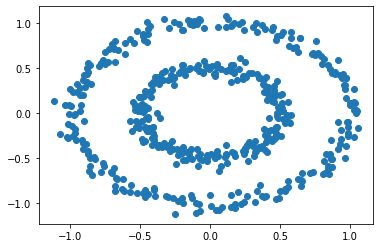

In [30]:
#Creo data dataset desde cero:

n = 500
p = 2

X, y = make_circles(n_samples=n, factor=0.5, noise=0.05)

y = y[:, np.newaxis]

plt.scatter(X[:,0], X[:,1])
plt.show()

In [10]:
print(y)

[1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1
 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0
 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0
 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0
 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0
 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0
 1 0 0 0 0 1 0 1 1 1 1 1 

In [16]:
class neural_layer():
    
    def __init__(self, n_conn, n_neur, act_f):
        
        self.act_f = act_f
        
        self.b = np.random.rand(1, n_neur) * 2 - 1
        self.w = np.random.rand(n_conn, n_neur) * 2 - 1

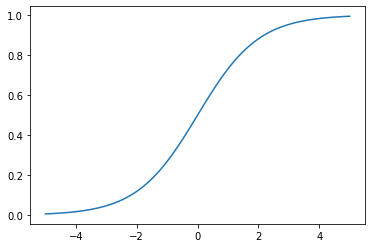

In [17]:
#Funciones de activación:

sigm = lambda x: 1/(1+np.e**(-x))

_x = np.linspace(-5,5,100)
plt.plot(_x, sigm(_x))

In [19]:
sigm = (lambda x: 1/(1+np.e**(-x)),
        lambda x: x*(1-x))

In [20]:
topology = [p, 4, 8, 16, 8, 4, 1]

In [26]:
def create_nn(topology, act_f):
    
    nn = []
    
    for l, layer in enumerate(topology[:-1]):
        
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
        
    return nn

In [27]:
create_nn(topology, sigm)

In [35]:
neural_net = create_nn(topology, sigm)

mse = (lambda yp, yr: np.mean((yp-yr)**2),
       lambda yp, yr: (yp-yr))

def train(neural_net, X, y, mse, lr=0.5, train=True):
    
    out = [(None, X)]
    
    for l, layer in enumerate(neural_net):
    
        z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    
        a = neural_net[l].act_f[0](z)
    
        out.append((z, a))
        
    print(out[-1][1])
    
    if train:
        
        deltas = []
        
        for l in reversed(range(0, len(neural_net))):
            
            z = out[l+1][0]
            a = out[l+1][1]
            
            if l == len(neural_net) -1:
                
                deltas.insert(0, mse[1](a, y)* neural_net[l].act_f[1](a))
                
            else:
                
                deltas.insert(0, deltas[0] @ neural_net[l+1].w.T * neural_net[l].act_f[1](a))
                
            _w = neural_net[l].w
            
            #Gradient_descent:
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr
            
    return out[-1][1]

In [36]:
train(neural_net, X, y, mse, 0.5)

[[0.67068807]
 [0.67054593]
 [0.67054335]
 [0.67067114]
 [0.67056416]
 [0.67078893]
 [0.67041331]
 [0.67068156]
 [0.67051193]
 [0.67080081]
 [0.67055047]
 [0.67062619]
 [0.67038791]
 [0.67073816]
 [0.67069119]
 [0.67056424]
 [0.67048338]
 [0.67077714]
 [0.67055435]
 [0.67048698]
 [0.67053785]
 [0.67067641]
 [0.67052072]
 [0.67077583]
 [0.67045404]
 [0.67079126]
 [0.67067386]
 [0.67070399]
 [0.67051295]
 [0.6707367 ]
 [0.67040724]
 [0.67068886]
 [0.67062535]
 [0.67074938]
 [0.67069728]
 [0.67041604]
 [0.67067063]
 [0.67065123]
 [0.67044839]
 [0.67052123]
 [0.67038787]
 [0.67047582]
 [0.67052903]
 [0.67066111]
 [0.67054542]
 [0.67080487]
 [0.6705682 ]
 [0.67058233]
 [0.67041409]
 [0.67059727]
 [0.67071176]
 [0.67062845]
 [0.67069317]
 [0.67072173]
 [0.67079092]
 [0.67076337]
 [0.67054645]
 [0.67077018]
 [0.67052673]
 [0.67065794]
 [0.67062366]
 [0.67078539]
 [0.67066339]
 [0.67054307]
 [0.67049943]
 [0.67040062]
 [0.67056645]
 [0.67044879]
 [0.67043341]
 [0.67072938]
 [0.67072711]
 [0.67

array([[0.67068807],
       [0.67054593],
       [0.67054335],
       [0.67067114],
       [0.67056416],
       [0.67078893],
       [0.67041331],
       [0.67068156],
       [0.67051193],
       [0.67080081],
       [0.67055047],
       [0.67062619],
       [0.67038791],
       [0.67073816],
       [0.67069119],
       [0.67056424],
       [0.67048338],
       [0.67077714],
       [0.67055435],
       [0.67048698],
       [0.67053785],
       [0.67067641],
       [0.67052072],
       [0.67077583],
       [0.67045404],
       [0.67079126],
       [0.67067386],
       [0.67070399],
       [0.67051295],
       [0.6707367 ],
       [0.67040724],
       [0.67068886],
       [0.67062535],
       [0.67074938],
       [0.67069728],
       [0.67041604],
       [0.67067063],
       [0.67065123],
       [0.67044839],
       [0.67052123],
       [0.67038787],
       [0.67047582],
       [0.67052903],
       [0.67066111],
       [0.67054542],
       [0.67080487],
       [0.6705682 ],
       [0.670